# **Task 1- Predicting the Lunar Albedo based on Chemical Composition**
### By Akhilesh Thite

# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# **Importing Dataset**

In [2]:
df = pd.read_csv("Albedo_Map.csv", header = None) # Lunar Albedo Map
fe = pd.read_csv("LPFe_Map.csv", header = None) # Fe(Iron) Map
k = pd.read_csv("LPK_Map.csv", header = None)   # K(Potassium) Map
th = pd.read_csv("LPTh_Map.csv", header = None) # Th(Thorium) Map
ti = pd.read_csv("LPTi_Map.csv", header = None) # Ti(Titanium) Map

In [3]:
# Left half for training
x = df.iloc[:, 0:360].values
# Right half for prediction
y = df.iloc[:, 360:720].values

# **Fe (Iron)**

### <font color='#585858'>**Spliting the image in two halves**

In [4]:
fe_left = fe.iloc[:, 0:360].values
fe_right = fe.iloc[:, 360:720].values

### <font color='#585858'>**Training Fe (Iron) Data on XGBoost Regression**

In [5]:
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
regressor = MultiOutputRegressor(XGBRegressor(objective = 'reg:squarederror',n_estimators=100, random_state = 0))
regressor.fit(x, fe_left)
# Predicting the results
y_pred = regressor.predict(y)

### <font color='#585858'>**Accuracy**

In [6]:
#comparing prediction with true value.
from sklearn.metrics import mean_squared_error
mean_squared_error(fe_right,y_pred)

5.440312948701514

### <font color='#585858'>**Output: Predicted Images Comparison**

Text(0.5, 1.0, 'Predicted Image')

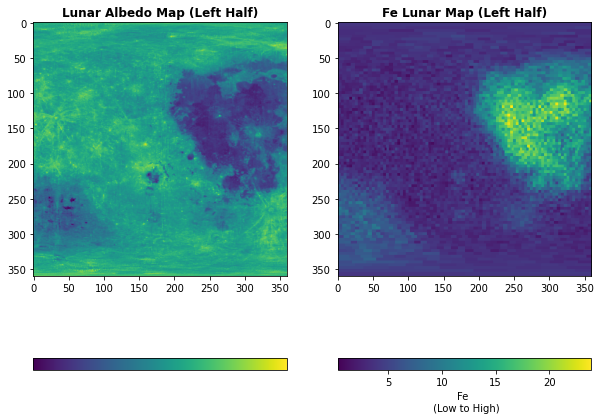

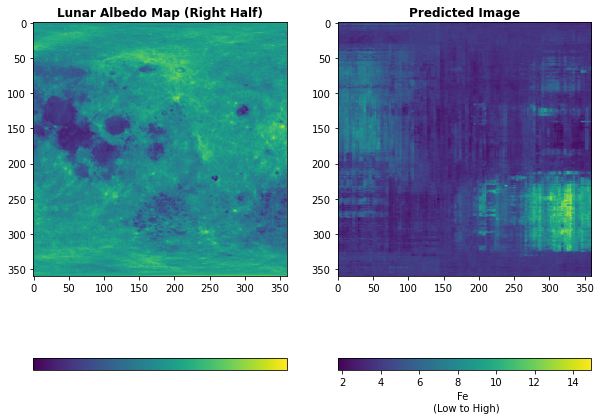

In [7]:
plt.figure(figsize =(10,10))
plt.subplot(1, 2, 1)
plt.imshow(x)
plt.title('Lunar Albedo Map (Left Half)', fontweight="bold")
plt.colorbar(orientation='horizontal', ticks=[])

plt.subplot(1, 2, 2)
plt.imshow(fe_left)
plt.title('Fe Lunar Map (Left Half)', fontweight="bold")
plt.colorbar(orientation='horizontal', label= 'Fe \n (Low to High)')

plt.figure(figsize =(10,10))
plt.subplot(1, 2, 1)
plt.imshow(y)
plt.colorbar(orientation='horizontal', ticks=[])
plt.title('Lunar Albedo Map (Right Half)', fontweight="bold")

plt.subplot(1, 2, 2)
plt.imshow(y_pred)
plt.colorbar(orientation='horizontal', label= 'Fe \n (Low to High)')
plt.title('Predicted Image', fontweight="bold")

### Note: In the above prediction, **Maximum pixel brightness of whole Fe (Iron) map is 20** whereas **Maximum brightness of right half of the image is 17.5-18**

### <font color='#585858'>**1D-Histogram**

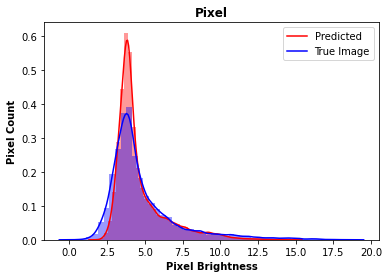

In [8]:
sns.distplot(y_pred, color= 'red')
sns.distplot(fe_right, color = 'blue')
plt.title('Pixel', fontweight="bold")
plt.xlabel('Pixel Brightness', fontweight="bold")
plt.ylabel('Pixel Count', fontweight="bold")
plt.legend(['Predicted', 'True Image'])

### **Observation: In this 1D-histogram,** <font color='#00008B'>**Count of the high brightness pixels of <font color='#FFA60F'>range 14 is less</font> (these pixels shows where we could find the most amount of "Iron" on the Moon)**</font>

# **K (Potassium)**

### <font color='#585858'>**Spliting the image in two halves**

In [9]:
k_left = k.iloc[:, 0:360].values
k_right = k.iloc[:, 360:720].values

### <font color='#585858'>**Training K (Potassium) Data on XGBoost Regression**

In [10]:
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
regressor = MultiOutputRegressor(XGBRegressor(objective = 'reg:squarederror',n_estimators=100, random_state = 0))
regressor.fit(x, k_left)
# Predicting the results
y_pred = regressor.predict(y)

### <font color='#585858'>**Accuracy**

In [11]:
#comparing prediction with true value.
from sklearn.metrics import mean_squared_error
mean_squared_error(k_right,y_pred)

518323.1215537422

### <font color='#585858'>**Output: Predicted Images Comparison**

Text(0.5, 1.0, 'Predicted Image')

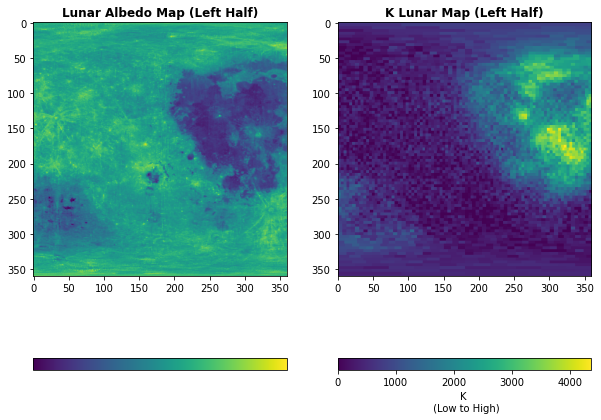

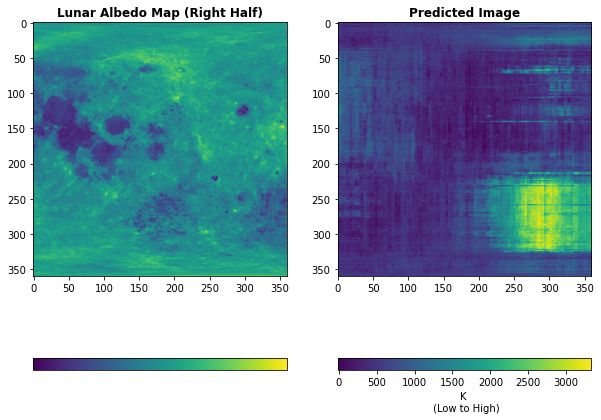

In [12]:
plt.figure(figsize =(10,10))
plt.subplot(1, 2, 1)
plt.imshow(x)
plt.title('Lunar Albedo Map (Left Half)', fontweight="bold")
plt.colorbar(orientation='horizontal', ticks=[])

plt.subplot(1, 2, 2)
plt.imshow(k_left)
plt.title('K Lunar Map (Left Half)', fontweight="bold")
plt.colorbar(orientation='horizontal', label= 'K \n (Low to High)')

plt.figure(figsize =(10,10))
plt.subplot(1, 2, 1)
plt.imshow(y)
plt.colorbar(orientation='horizontal', ticks=[])
plt.title('Lunar Albedo Map (Right Half)', fontweight="bold")

plt.subplot(1, 2, 2)
plt.imshow(y_pred)
plt.colorbar(orientation='horizontal', label= 'K \n (Low to High)')
plt.title('Predicted Image', fontweight="bold")

### <font color='#585858'>**1D-Histogram**

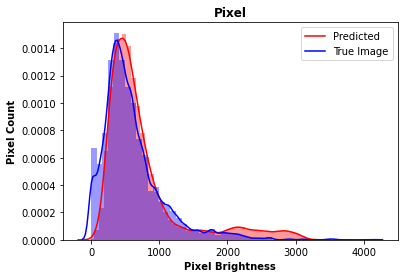

In [13]:
sns.distplot(y_pred, color= 'red')
sns.distplot(k_right, color = 'blue')
plt.title('Pixel', fontweight="bold")
plt.xlabel('Pixel Brightness', fontweight="bold")
plt.ylabel('Pixel Count', fontweight="bold")
plt.legend(['Predicted', 'True Image'])

### **Observation: In this 1D-histogram** <font color='#00008B'>**Count of the high brightness pixels of <font color='#FFA60F'>range (3k and more) is less</font> (these pixels shows where we can find the most amount of "Potassium" on the Moon)**</font>

# **Th (Thorium)**

### <font color='#585858'>**Spliting the image in two halves**

In [14]:
th_left = th.iloc[:, 0:360].values
th_right = th.iloc[:, 360:720].values

### <font color='#585858'>**Training Th (Thorium) Data on XGBoost Regression**

In [15]:
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
regressor = MultiOutputRegressor(XGBRegressor(objective = 'reg:squarederror',n_estimators=100, random_state = 0))
regressor.fit(x, th_left)
# Predicting the results
y_pred = regressor.predict(y)

### <font color='#585858'>**Accuracy**

In [16]:
#comparing prediction with true value.
from sklearn.metrics import mean_squared_error
mean_squared_error(th_right,y_pred)

3.1743583432790223

### <font color='#585858'>**Output: Predicted Images Comparison**

Text(0.5, 1.0, 'Predicted Image')

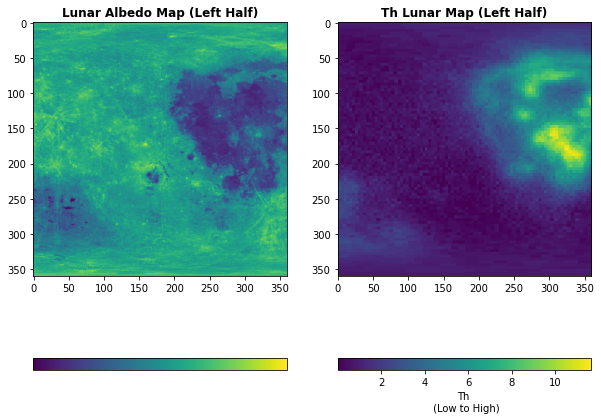

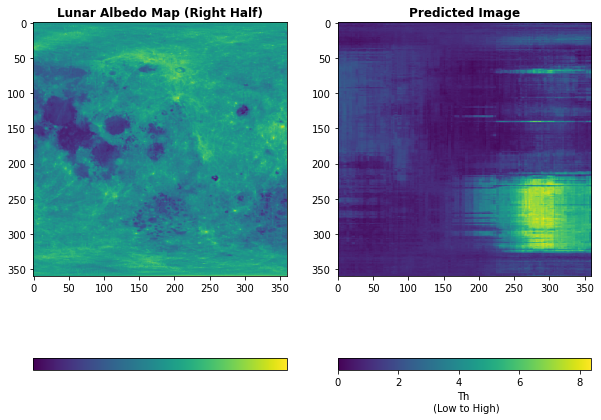

In [17]:
plt.figure(figsize =(10,10))
plt.subplot(1, 2, 1)
plt.imshow(x)
plt.title('Lunar Albedo Map (Left Half)', fontweight="bold")
plt.colorbar(orientation='horizontal', ticks=[])

plt.subplot(1, 2, 2)
plt.imshow(th_left)
plt.title('Th Lunar Map (Left Half)', fontweight="bold")
plt.colorbar(orientation='horizontal', label= 'Th \n (Low to High)')

plt.figure(figsize =(10,10))
plt.subplot(1, 2, 1)
plt.imshow(y)
plt.colorbar(orientation='horizontal', ticks=[])
plt.title('Lunar Albedo Map (Right Half)', fontweight="bold")

plt.subplot(1, 2, 2)
plt.imshow(y_pred)
plt.colorbar(orientation='horizontal', label= 'Th \n (Low to High)')
plt.title('Predicted Image', fontweight="bold")

### Note: In the above prediction, **Maximum pixel brightness of whole Th (Thorium) map is 11-12** whereas **Maximum brightness of right half of the image is 10**

### <font color='#585858'>**1D-Histogram**

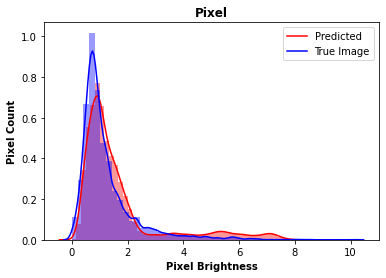

In [18]:
sns.distplot(y_pred, color= 'red')
sns.distplot(th_right, color = 'blue')
plt.title('Pixel', fontweight="bold")
plt.xlabel('Pixel Brightness', fontweight="bold")
plt.ylabel('Pixel Count', fontweight="bold")
plt.legend(['Predicted', 'True Image'])

###**Observation: In this 1D-histogram,to** <font color='#00008B'>**Count of the high brightness pixels of <font color='#FFA60F'>range 8 is less</font> (these pixels shows where we can find the most amount of "Thorium" on the Moon)**</font>

# **Ti (Titanium)**

### <font color='#585858'>**Spliting the image in two halves**

In [19]:
ti_left = ti.iloc[:, 0:360].values
ti_right = ti.iloc[:, 360:720].values

### <font color='#585858'>**Training Ti (Titanium) Data on XGBoost Regression**

In [20]:
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
regressor = MultiOutputRegressor(XGBRegressor(objective = 'reg:squarederror',n_estimators=100, random_state = 0))
regressor.fit(x, ti_left)
# Predicting the results
y_pred = regressor.predict(y)

### <font color='#585858'>**Accuracy**

In [21]:
#comparing prediction with true value.
from sklearn.metrics import mean_squared_error
mean_squared_error(ti_right,y_pred)

0.3563371584111233

### <font color='#585858'>**Output: Predicted Images Comparison**

Text(0.5, 1.0, 'Predicted Image')

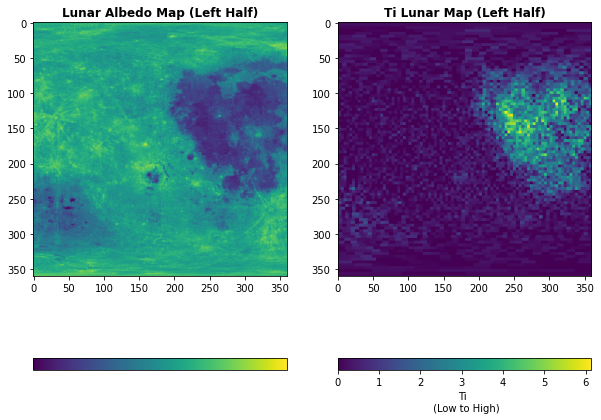

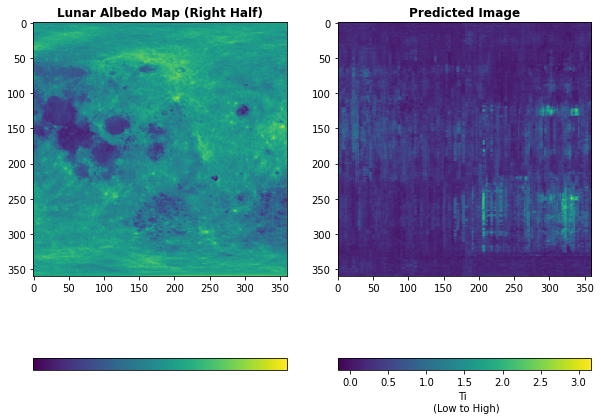

In [22]:
plt.figure(figsize =(10,10))
plt.subplot(1, 2, 1)
plt.imshow(x)
plt.title('Lunar Albedo Map (Left Half)', fontweight="bold")
plt.colorbar(orientation='horizontal', ticks=[])

plt.subplot(1, 2, 2)
plt.imshow(ti_left)
plt.title('Ti Lunar Map (Left Half)', fontweight="bold")
plt.colorbar(orientation='horizontal', label= 'Ti \n (Low to High)')

plt.figure(figsize =(10,10))
plt.subplot(1, 2, 1)
plt.imshow(y)
plt.colorbar(orientation='horizontal', ticks=[])
plt.title('Lunar Albedo Map (Right Half)', fontweight="bold")

plt.subplot(1, 2, 2)
plt.imshow(y_pred)
plt.colorbar(orientation='horizontal', label= 'Ti \n (Low to High)')
plt.title('Predicted Image', fontweight="bold")

### <font color='#585858'>**1D-Histogram**

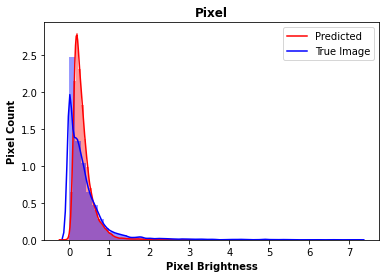

In [23]:
sns.distplot(y_pred, color= 'red')
sns.distplot(ti_right, color = 'blue')
plt.title('Pixel', fontweight="bold")
plt.xlabel('Pixel Brightness', fontweight="bold")
plt.ylabel('Pixel Count', fontweight="bold")
plt.legend(['Predicted', 'True Image'])

### **Observation: In this 1D-histogram,** <font color='#00008B'>**Count of the high brightness pixels of <font color='#FFA60F'>range 3 is less</font> (these pixels shows where we can find the most amount of "Titanium" on the Moon)**</font>